In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
titanic_data = pd.read_csv('train.csv')

In [3]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data = titanic_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])

In [6]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
le = LabelEncoder()

In [8]:
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])

In [9]:
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,NaN,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


In [10]:
titanic_data = titanic_data.fillna(titanic_data['Age'].mean())

In [11]:
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
5,0,3,1,29.699118,0,0,8.4583
6,0,1,1,54.000000,0,0,51.8625
7,0,3,1,2.000000,3,1,21.0750
8,1,3,0,27.000000,0,2,11.1333
9,1,2,0,14.000000,1,0,30.0708


In [12]:
input_cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
output_cols = ["Survived"]

x = titanic_data[input_cols]
y = titanic_data[output_cols]

In [13]:
print(x.shape, y.shape)

(891, 6) (891, 1)


In [14]:
def entropy(col):
    
    counts = np.unique(col, return_counts = True)
    N = float(col.shape[0])
    ent = 0.0
    
    for i in counts[1]:
        
        prob = i / N
        ent += (-1.0*prob*np.log2(prob))
        
    return ent    

In [15]:
col = np.array([1,1,0,1,0,0])
counts = np.unique(col, return_counts = True)

In [16]:
counts

(array([0, 1]), array([3, 3], dtype=int64))

In [17]:
entropy(col)

1.0

In [18]:
def divide_data(x_data, key_col, threshold_val):
    
    x_right = pd.DataFrame([], columns = x_data.columns)
    x_left = pd.DataFrame([], columns = x_data.columns)
    
    for i in range(x_data.shape[0]):
        
        val = x_data[key_col].loc[i]
        
        if val > threshold_val:
            x_right = x_right.append(x_data.loc[i])
        else:
            x_left = x_left.append(x_data.loc[i])
            
    return x_left,x_right       

In [19]:
def information_gain(x_data, key_col, threshold_val):
    
    left,right = divide_data(x_data, key_col, threshold_val)
    
    # Calculating % of total samples on left and right side
    left_side = float(left.shape[0])/x_data.shape[0]
    right_side = float(right.shape[0])/x_data.shape[0]
    
    # All samples come to one side
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000000                          # Min information gain
    
    info_gain = entropy(x_data.Survived) - (left_side*entropy(left.Survived) + right_side*entropy(right.Survived))
    
    return info_gain

In [20]:
for colname in x.columns:
    print(f'The information gain of {colname} is : ',information_gain(titanic_data, colname, titanic_data[colname].mean()))

The information gain of Pclass is :  0.07579362743608165
The information gain of Sex is :  0.2176601066606142
The information gain of Age is :  0.001158644038169343
The information gain of SibSp is :  0.009584541813400071
The information gain of Parch is :  0.015380754493137694
The information gain of Fare is :  0.042140692838995464


#### Since Sex has the maximum information gain, so the first node we will be taking to make decision whether a passenger has survived or not will be based on Sex.

#### Since Sex has the lowest gini impurity, so the first node we will be taking to make decision whether a passenger has survived or not will be based on Sex.


In [21]:
class DecisionTree:
    
    def __init__(self, depth = 0, max_depth = 4):
        self.left = None
        self.right = None
        self.key_col = None
        self.threshold_val = None
        self.depth = depth
        self.max_depth = max_depth
        self.target = None
        
    def train(self, X_train):
        
        column_names = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
        info_gains = []
        
        for i in column_names:
            i_gain = information_gain(X_train, i, X_train[i].mean())
            info_gains.append(i_gain)
        
        self.key_col = column_names[np.argmax(info_gains)]
        self.threshold_val = X_train[self.key_col].mean()
        print("Making trees on feature: ", self.key_col)
            
        
         # Splitting the Data
        left_data,right_data = divide_data(X_train, self.key_col, self.threshold_val)

        left_data = left_data.reset_index(drop = True)
        right_data = right_data.reset_index(drop = True)

            # For a True leaf node
        if left_data.shape[0] == 0 or right_data.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                    self.target = 'Survived'
            else:
                    self.target = 'Dead'
            return       

            # Stop early when depth >= max depth
        if(self.depth >= self.max_depth):
            if X_train.Survived.mean() >= 0.5:
                    self.target = 'Survived'
            else:
                    self.target = 'Dead'
            return

            #Recursive Case for generating leaf node
        self.left = DecisionTree(depth = self.depth+1, max_depth = self.max_depth)
        self.left.train(left_data)

        self.right = DecisionTree(depth = self.depth+1, max_depth = self.max_depth)
        self.right.train(right_data)


            # Setting the target at each node
        if X_train.Survived.mean() >= 0.5:
                self.target = 'Survived'
        else:
                self.target = 'Dead'

        return
    
        
    
    
    
    def predict(self, test):
        
        if test[self.key_col] > self.threshold_val:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            #go to left
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [22]:
split = int(0.7 * titanic_data.shape[0])
train_data = titanic_data[:split]
test_data = titanic_data[split:]
test_data = test_data.reset_index(drop = True)

In [23]:
print(train_data.shape, test_data.shape)

(623, 7) (268, 7)


In [24]:
dt = DecisionTree()

In [25]:
dt.train(train_data)

Making trees on feature:  Sex
Making trees on feature:  Pclass
Making trees on feature:  Age
Making trees on feature:  SibSp
Making trees on feature:  Pclass
Making trees on feature:  SibSp
Making trees on feature:  SibSp
Making trees on feature:  Fare
Making trees on feature:  Pclass
Making trees on feature:  Parch
Making trees on feature:  SibSp
Making trees on feature:  Fare
Making trees on feature:  Fare
Making trees on feature:  Fare
Making trees on feature:  Age
Making trees on feature:  Fare
Making trees on feature:  Fare
Making trees on feature:  Parch
Making trees on feature:  Fare
Making trees on feature:  Age
Making trees on feature:  Fare
Making trees on feature:  Age
Making trees on feature:  Fare
Making trees on feature:  Age
Making trees on feature:  Pclass
Making trees on feature:  Age
Making trees on feature:  SibSp
Making trees on feature:  Age
Making trees on feature:  SibSp
Making trees on feature:  Age
Making trees on feature:  Parch


In [26]:
dt.key_col

'Sex'

In [27]:
dt.threshold_val

0.6292134831460674

In [28]:
dt.left.key_col

'Pclass'

In [29]:
dt.right.key_col

'Fare'

In [30]:
y_pred = []
for i in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[i]))

In [31]:
y_actual = test_data["Survived"]

In [32]:
y_actual

0      0
1      0
2      0
3      0
4      1
      ..
263    0
264    1
265    0
266    1
267    0
Name: Survived, Length: 268, dtype: int64

In [33]:
le = LabelEncoder()

In [34]:
y_pred = le.fit_transform(y_pred)

In [35]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [36]:
y_pred = np.array(y_pred)
y_pred.shape

(268,)

In [37]:
y_actual = y_actual.to_numpy()

In [38]:
y_actual.shape

(268,)

In [39]:
accuracy = np.sum((y_pred == y_actual) / y_pred.shape[0])

In [40]:
print(accuracy*100)

82.08955223880596


In [41]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [42]:
cm = confusion_matrix(y_actual, y_pred)
c_reprt = classification_report(y_actual, y_pred)
acc_score = accuracy_score(y_actual, y_pred)

Confusion Matrix:
 [[160  12]
 [ 36  60]]
Classification Report:
                precision    recall  f1-score   support

           0       0.82      0.93      0.87       172
           1       0.83      0.62      0.71        96

    accuracy                           0.82       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.82      0.82      0.81       268

Accuracy Score:
  0.8208955223880597


<AxesSubplot:title={'center':'Decision Tree Model - Confusion Matrix'}>

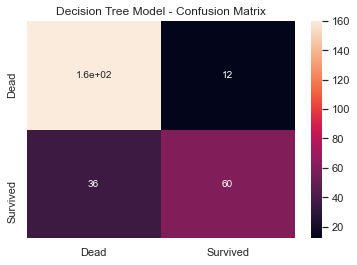

In [43]:
print("Confusion Matrix:\n", cm)
print("Classification Report:\n ",c_reprt)
print("Accuracy Score:\n ",acc_score)

plt.title("Decision Tree Model - Confusion Matrix")
sns.heatmap(cm, annot = True,
            xticklabels = ["Dead","Survived"],
            yticklabels = ["Dead","Survived"])

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
sk_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [46]:
sk_tree.fit(train_data[input_cols], train_data[output_cols])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [48]:
sk_tree.score(test_data[input_cols], test_data[output_cols])

0.8283582089552238

In [49]:
#from six import StringIO
#from sklearn.tree import export_graphviz
#from IPython.display import Image 
#import pydotplus

In [50]:
#dot_data = StringIO()
#export_graphviz(decision_tree=sk_tree,out_file=dot_data,filled=True,rounded=True,special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#Image(graph.create_png())

## Random Forest

In [51]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))

X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))

In [52]:
sk_tree = DecisionTreeClassifier(criterion = 'entropy')
sk_tree.fit(X_train, Y_train)
sk_tree.score(X_train, Y_train)

0.9823434991974318

In [53]:
sk_tree.score(X_test, Y_test)

0.7798507462686567

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=5)

In [56]:
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
rf.score(X_train, Y_train)

0.8523274478330658

In [58]:
rf.score(X_test, Y_test)

0.832089552238806

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
accuracy = cross_val_score(RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=5), X_train, Y_train, cv = 5).mean()

In [61]:
accuracy

0.7978775217613927

In [62]:
accuracy_list = []
for i in range(1,50):
    accuracy = cross_val_score(RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=5), X_train, Y_train, cv = 5).mean()
    accuracy_list.append(accuracy)

In [63]:
print(accuracy_list)

[0.7147383512544804, 0.7865359959037379, 0.7850252944188428, 0.7897622119815668, 0.7947535074244751, 0.8027037378392217, 0.7995539170506912, 0.7930259088581669, 0.7947154121863799, 0.8010138248847927, 0.8202144393241169, 0.8027164362519201, 0.8058652329749105, 0.7962771121351766, 0.815426932923707, 0.8155682539682539, 0.8122269329237071, 0.8074525345622121, 0.8074525345622121, 0.8138654377880183, 0.8138400409626216, 0.8042519201228877, 0.8090269329237071, 0.8011670250896057, 0.8201890424987199, 0.8089884280593959, 0.8266662570404506, 0.8203168458781361, 0.8170527393753201, 0.8282916538658475, 0.8138783410138248, 0.8266916538658474, 0.8187936507936507, 0.8202529441884281, 0.8315174603174602, 0.8027289298515103, 0.8170783410138249, 0.8250531490015363, 0.8138783410138248, 0.8187170506912441, 0.8154914490527393, 0.8138269329237071, 0.8250660522273426, 0.8123039426523299, 0.8251172555043522, 0.8187553507424475, 0.8171039426523297, 0.8186785458269329, 0.820253149001536]


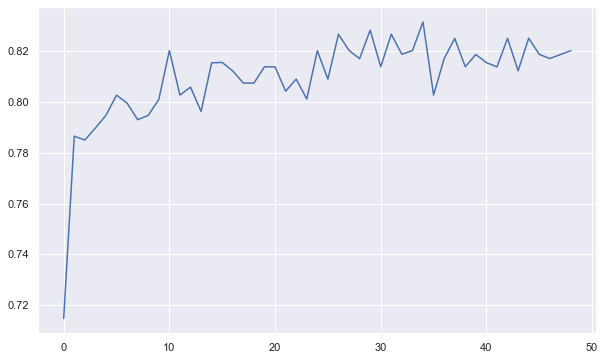

In [64]:
plt.figure(figsize = (10,6))
plt.plot(accuracy_list)
plt.show()

In [65]:
print(np.argmax(accuracy_list))

34


In [69]:
rf_new = RandomForestClassifier(n_estimators= 35, criterion='entropy', max_depth=5)
rf_new.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
rf_new.score(X_train, Y_train)

0.8459069020866774

In [71]:
rf_new.score(X_test, Y_test)

0.8246268656716418